##CSE-221710313011-D.Manasa

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Wholesale%20customers%20data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df.shape

(440, 8)

In [8]:
# Scale down the data
normalized_data = scale(df.iloc[:,1:])
normalized_data

array([[ 0.59066829,  0.05293319,  0.52356777, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 0.59066829, -0.39130197,  0.54445767, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 0.59066829, -0.44702926,  0.40853771, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 0.59066829,  0.20032554,  1.31467078, ..., -0.54337975,
         2.51121768,  0.12145607],
       [ 0.59066829, -0.13538389, -0.51753572, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [ 0.59066829, -0.72930698, -0.5559243 , ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [9]:
# Dendrogram
from scipy.cluster.hierarchy import linkage
a = linkage(normalized_data, method='complete', metric = 'euclidean')

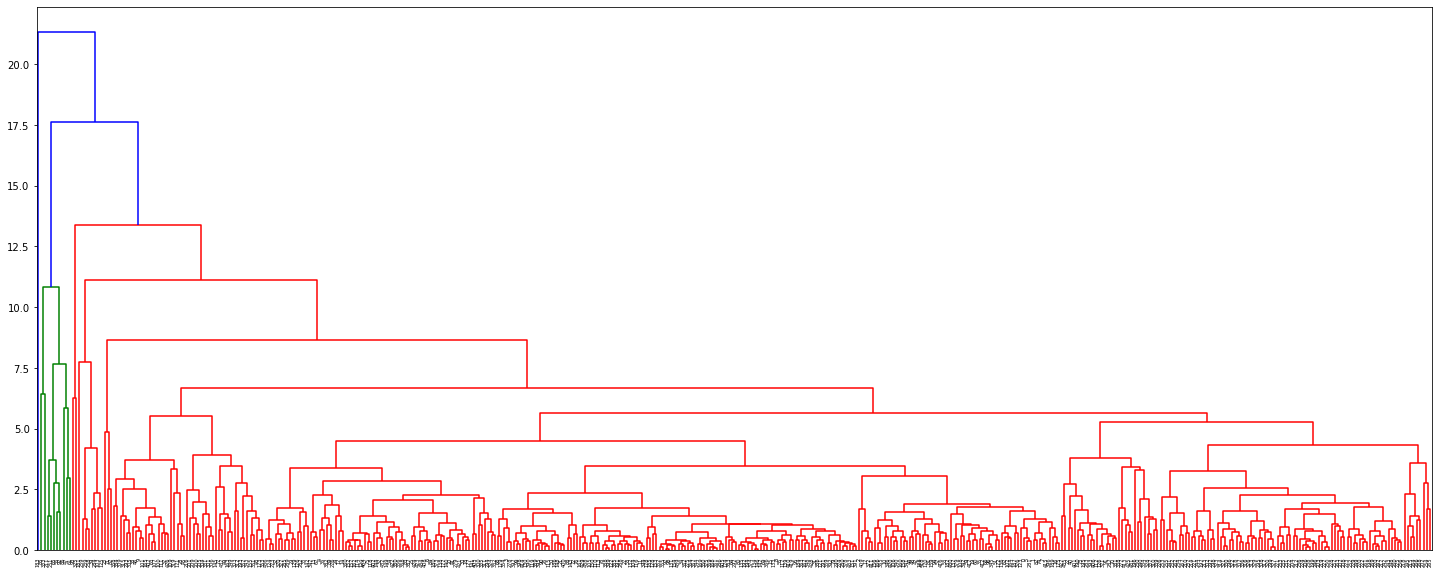

In [10]:
# Dendrogram based on complete linkage
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(25,10))
sch.dendrogram(a)
plt.show()

In [11]:
# 5 clusters
from sklearn.cluster import AgglomerativeClustering
clust = AgglomerativeClustering(n_clusters = 5, linkage='complete',
                                affinity='euclidean').fit(normalized_data)

In [12]:
# Cluster Labels
clust.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [13]:
# Dataframe for cluster labels
cluster = pd.DataFrame(clust.labels_)
cluster

,0
0,2
1,2
2,2
3,2
4,2
...,...
435,2
436,2
437,2
438,2


In [14]:
# Create a new column 'cluster' in Univ Dataset
df['cluster'] = cluster
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,2


In [15]:
df1 = df.iloc[:, [8, 0,1,2,3,4,5,6,7]]
df1

,cluster,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,2,3,12669,9656,7561,214,2674,1338
1,2,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,2,1,3,13265,1196,4221,6404,507,1788
4,2,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,2,1,3,29703,12051,16027,13135,182,2204
436,2,1,3,39228,1431,764,4510,93,2346
437,2,2,3,14531,15488,30243,437,14841,1867
438,2,1,3,10290,1981,2232,1038,168,2125


In [16]:
# Aggregate the cluster means
df1.iloc[:,3:].groupby(df1.cluster).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
1,65795.125000,6707.375000,7613.250000,10585.250000,1336.750000,2960.000000
2,10771.463007,4978.016706,6960.451074,2634.868735,2402.933174,1340.298329
3,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000
4,22015.500000,9937.000000,7844.000000,47939.000000,671.500000,4153.500000


In [17]:
# Running KMeans Algorithm multiple times to obtain the feasible K value
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', random_state=0)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)
    
wcss

[3080.0,
 2392.881865963342,
 2025.2725309320044,
 1708.3698988515748,
 1437.7080566209986,
 1209.7198220421142]

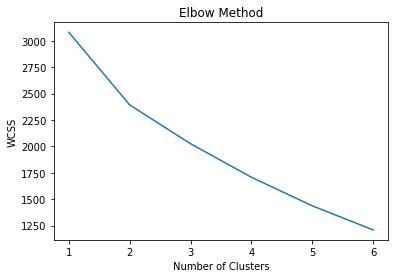

In [18]:
# Plot of wcss Vs K values
plt.plot(range(1,7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()